In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import mygene
from sklearn.preprocessing import QuantileTransformer

In [58]:
df = pd.read_csv('data/GSE150365_LMNA_raw_counts.txt', sep='\t')
cond = pd.read_csv('data/conditions.tsv', sep='\t')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55487 entries, 0 to 55486
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gene_id_ENSEMBL  55487 non-null  object
 1   wt_control_1     55487 non-null  int64 
 2   wt_control_2     55487 non-null  int64 
 3   wt_control_3     55487 non-null  int64 
 4   wt_HS_2d_1       55487 non-null  int64 
 5   wt_HS_2d_2       55487 non-null  int64 
 6   wt_HS_2d_3       55487 non-null  int64 
 7   wt_HS_term_1     55487 non-null  int64 
 8   wt_HS_term_2     55487 non-null  int64 
 9   wt_HS_term_3     55487 non-null  int64 
 10  232_control_1    55487 non-null  int64 
 11  232_control_2    55487 non-null  int64 
 12  232_control_3    55487 non-null  int64 
 13  232_HS_2d_1      55487 non-null  int64 
 14  232_HS_2d_2      55487 non-null  int64 
 15  232_HS_2d_3      55487 non-null  int64 
 16  232_HS_term_1    55487 non-null  int64 
 17  232_HS_term_2    55487 non-null

In [60]:
cond = cond[(cond['Treatment'] == 'control') | (cond['Treatment'] == 'HS')]
cond.head()

,Name,Condition,Cell_type,Treatment,Day,Replicate
0,wt_control_1,wt_control,WT,control,0,1
1,wt_control_2,wt_control,WT,control,0,2
2,wt_control_3,wt_control,WT,control,0,3
9,wt_HS_2d_1,wt_HS_2d,WT,HS,2,1
10,wt_HS_2d_2,wt_HS_2d,WT,HS,2,2


In [61]:
columns = list(cond['Name'])

In [62]:
df = df[['Gene_id_ENSEMBL'] + columns]

In [63]:
df.head()

,Gene_id_ENSEMBL,wt_control_1,wt_control_2,wt_control_3,wt_HS_2d_1,wt_HS_2d_2,wt_HS_2d_3,wt_HS_term_1,wt_HS_term_2,wt_HS_term_3,...,232_HS_term_3,482_control_1,482_control_2,482_control_3,482_HS_2d_1,482_HS_2d_2,482_HS_2d_3,482_HS_term_1,482_HS_term_2,482_HS_term_3
0,ENSMUSG00000102693,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,ENSMUSG00000102851,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


wt_control_1     13085107
wt_control_2     11707673
wt_control_3     11850531
wt_HS_2d_1       13489871
wt_HS_2d_2       13374588
wt_HS_2d_3       13591269
wt_HS_term_1     11668747
wt_HS_term_2     11950904
wt_HS_term_3     12875240
232_control_1    12915554
232_control_2     5407278
232_control_3     9217078
232_HS_2d_1      15165581
232_HS_2d_2      12967727
232_HS_2d_3      12546366
232_HS_term_1     5018790
232_HS_term_2    12197676
232_HS_term_3    10471612
482_control_1    10879810
482_control_2    12247422
482_control_3    10711265
482_HS_2d_1      12916873
482_HS_2d_2      13002699
482_HS_2d_3      11804913
482_HS_term_1     5385985
482_HS_term_2    14279693
482_HS_term_3    14764905
dtype: int64


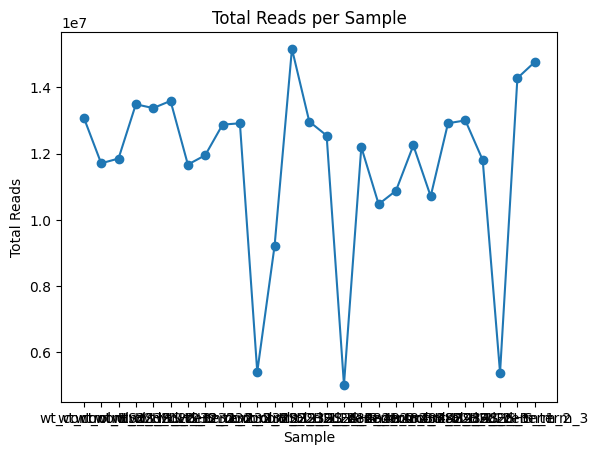

Среднее количество ридов: 11685005.814814815
Образцы с количеством ридов меньше 7.5 миллионов:
232_control_2    5407278
232_HS_term_1    5018790
482_HS_term_1    5385985
dtype: int64


In [64]:
column_sums = df[columns].sum()

print(column_sums)

# Простой график количества ридов
plt.plot(column_sums, marker='o')
plt.xlabel('Sample')
plt.ylabel('Total Reads')
plt.title('Total Reads per Sample')
plt.show()

# Среднее количество ридов во всем эксперименте
mean_reads = column_sums.mean()
print(f'Среднее количество ридов: {mean_reads}')

# Образцы с количеством ридов меньше 7.5 миллионов
low_read_samples = column_sums[column_sums < 7500000]
print('Образцы с количеством ридов меньше 7.5 миллионов:')
print(low_read_samples)

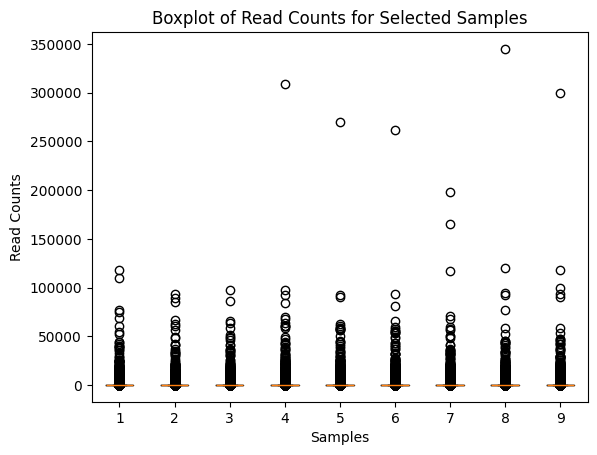

In [65]:
plt.boxplot(df[columns[:9]])
plt.xlabel('Samples')
plt.ylabel('Read Counts')
plt.title('Boxplot of Read Counts for Selected Samples')
plt.show()

In [66]:
df = df.drop_duplicates(subset='Gene_id_ENSEMBL')
len(df)

55487

In [69]:
mg = mygene.MyGeneInfo()
gene_info_df = pd.DataFrame(mg.querymany(df['Gene_id_ENSEMBL'], scopes='ensembl.gene', fields='symbol', species='mouse'))
df = df.merge(gene_info_df[['query', 'symbol']], left_on='Gene_id_ENSEMBL', right_on='query', how='left')
df.drop(columns='query', inplace=True)
df.head()

6 input query terms found dup hits:	[('ENSMUSG00000086727', 2), ('ENSMUSG00000111511', 2), ('ENSMUSG00000114630', 5), ('ENSMUSG000000086
3516 input query terms found no hit:	['ENSMUSG00000096126', 'ENSMUSG00000088000', 'ENSMUSG00000093015', 'ENSMUSG00000093970', 'ENSMUSG000


,Gene_id_ENSEMBL,wt_control_1,wt_control_2,wt_control_3,wt_HS_2d_1,wt_HS_2d_2,wt_HS_2d_3,wt_HS_term_1,wt_HS_term_2,wt_HS_term_3,...,482_control_1,482_control_2,482_control_3,482_HS_2d_1,482_HS_2d_2,482_HS_2d_3,482_HS_term_1,482_HS_term_2,482_HS_term_3,symbol
0,ENSMUSG00000102693,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,4933401J01Rik
1,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm26206
2,ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Xkr4
3,ENSMUSG00000102851,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm18956
4,ENSMUSG00000103377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm37180


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55496 entries, 0 to 55495
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gene_id_ENSEMBL  55496 non-null  object
 1   wt_control_1     55496 non-null  int64 
 2   wt_control_2     55496 non-null  int64 
 3   wt_control_3     55496 non-null  int64 
 4   wt_HS_2d_1       55496 non-null  int64 
 5   wt_HS_2d_2       55496 non-null  int64 
 6   wt_HS_2d_3       55496 non-null  int64 
 7   wt_HS_term_1     55496 non-null  int64 
 8   wt_HS_term_2     55496 non-null  int64 
 9   wt_HS_term_3     55496 non-null  int64 
 10  232_control_1    55496 non-null  int64 
 11  232_control_2    55496 non-null  int64 
 12  232_control_3    55496 non-null  int64 
 13  232_HS_2d_1      55496 non-null  int64 
 14  232_HS_2d_2      55496 non-null  int64 
 15  232_HS_2d_3      55496 non-null  int64 
 16  232_HS_term_1    55496 non-null  int64 
 17  232_HS_term_2    55496 non-null

In [71]:
df = df.dropna(subset=['symbol'])
df.head()

,Gene_id_ENSEMBL,wt_control_1,wt_control_2,wt_control_3,wt_HS_2d_1,wt_HS_2d_2,wt_HS_2d_3,wt_HS_term_1,wt_HS_term_2,wt_HS_term_3,...,482_control_1,482_control_2,482_control_3,482_HS_2d_1,482_HS_2d_2,482_HS_2d_3,482_HS_term_1,482_HS_term_2,482_HS_term_3,symbol
0,ENSMUSG00000102693,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,4933401J01Rik
1,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm26206
2,ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Xkr4
3,ENSMUSG00000102851,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm18956
4,ENSMUSG00000103377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gm37180


In [72]:
df.query('symbol == "Actb"')

,Gene_id_ENSEMBL,wt_control_1,wt_control_2,wt_control_3,wt_HS_2d_1,wt_HS_2d_2,wt_HS_2d_3,wt_HS_term_1,wt_HS_term_2,wt_HS_term_3,...,482_control_1,482_control_2,482_control_3,482_HS_2d_1,482_HS_2d_2,482_HS_2d_3,482_HS_term_1,482_HS_term_2,482_HS_term_3,symbol
15993,ENSMUSG00000029580,52554,40699,49100,36873,34421,36828,14308,24041,28560,...,37838,52971,46509,40462,34277,33547,8919,27158,27216,Actb


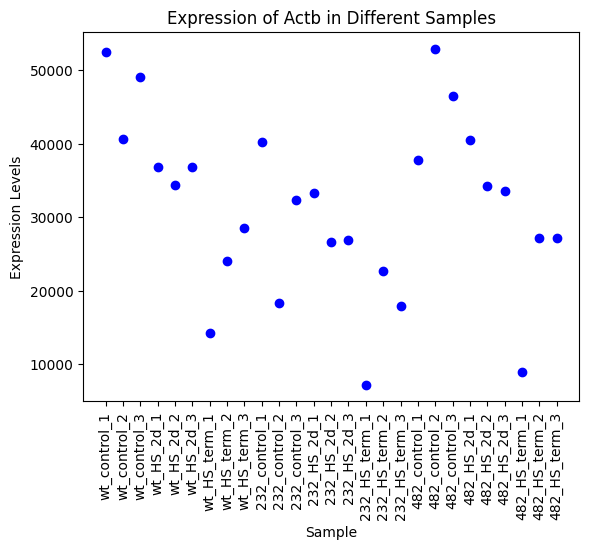

In [76]:
df_filtered = df.query('symbol == "Actb"')

plt.scatter(columns, df_filtered[columns].values.flatten(), color='b')

plt.xlabel('Sample')
plt.ylabel('Expression Levels')
plt.title('Expression of Actb in Different Samples')
plt.xticks(rotation=90)

plt.show()

In [79]:
df[df['Gene_id_ENSEMBL'] == 'ENSMUSG00000086727']

,Gene_id_ENSEMBL,wt_control_1,wt_control_2,wt_control_3,wt_HS_2d_1,wt_HS_2d_2,wt_HS_2d_3,wt_HS_term_1,wt_HS_term_2,wt_HS_term_3,...,482_control_1,482_control_2,482_control_3,482_HS_2d_1,482_HS_2d_2,482_HS_2d_3,482_HS_term_1,482_HS_term_2,482_HS_term_3,symbol
396,ENSMUSG00000086727,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,Gm29669
397,ENSMUSG00000086727,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,Alyreffm1


In [80]:
df = df.drop_duplicates(subset='Gene_id_ENSEMBL')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51967 entries, 0 to 55495
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gene_id_ENSEMBL  51967 non-null  object
 1   wt_control_1     51967 non-null  int64 
 2   wt_control_2     51967 non-null  int64 
 3   wt_control_3     51967 non-null  int64 
 4   wt_HS_2d_1       51967 non-null  int64 
 5   wt_HS_2d_2       51967 non-null  int64 
 6   wt_HS_2d_3       51967 non-null  int64 
 7   wt_HS_term_1     51967 non-null  int64 
 8   wt_HS_term_2     51967 non-null  int64 
 9   wt_HS_term_3     51967 non-null  int64 
 10  232_control_1    51967 non-null  int64 
 11  232_control_2    51967 non-null  int64 
 12  232_control_3    51967 non-null  int64 
 13  232_HS_2d_1      51967 non-null  int64 
 14  232_HS_2d_2      51967 non-null  int64 
 15  232_HS_2d_3      51967 non-null  int64 
 16  232_HS_term_1    51967 non-null  int64 
 17  232_HS_term_2    51967 non-null  int

In [81]:
gene_info = mg.querymany(df['symbol'], scopes='symbol', fields='entrezgene', species='mouse')
gene_info_df = pd.DataFrame(gene_info)
df = df.merge(gene_info_df[['query', 'entrezgene']], left_on='symbol', right_on='query', how='left')
df.drop(columns='query', inplace=True)

9408 input query terms found dup hits:	[('4933401J01Rik', 2), ('Gm1992', 2), ('Gm19938', 2), ('Gm10568', 2), ('Gm37323', 2), ('Gm7369', 2),


In [83]:
df = df.rename(columns={'entrezgene': 'entrez_id'})

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61871 entries, 0 to 61870
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gene_id_ENSEMBL  61871 non-null  object
 1   wt_control_1     61871 non-null  int64 
 2   wt_control_2     61871 non-null  int64 
 3   wt_control_3     61871 non-null  int64 
 4   wt_HS_2d_1       61871 non-null  int64 
 5   wt_HS_2d_2       61871 non-null  int64 
 6   wt_HS_2d_3       61871 non-null  int64 
 7   wt_HS_term_1     61871 non-null  int64 
 8   wt_HS_term_2     61871 non-null  int64 
 9   wt_HS_term_3     61871 non-null  int64 
 10  232_control_1    61871 non-null  int64 
 11  232_control_2    61871 non-null  int64 
 12  232_control_3    61871 non-null  int64 
 13  232_HS_2d_1      61871 non-null  int64 
 14  232_HS_2d_2      61871 non-null  int64 
 15  232_HS_2d_3      61871 non-null  int64 
 16  232_HS_term_1    61871 non-null  int64 
 17  232_HS_term_2    61871 non-null

In [85]:
df = df.dropna(subset=['entrez_id'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41642 entries, 1 to 61870
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gene_id_ENSEMBL  41642 non-null  object
 1   wt_control_1     41642 non-null  int64 
 2   wt_control_2     41642 non-null  int64 
 3   wt_control_3     41642 non-null  int64 
 4   wt_HS_2d_1       41642 non-null  int64 
 5   wt_HS_2d_2       41642 non-null  int64 
 6   wt_HS_2d_3       41642 non-null  int64 
 7   wt_HS_term_1     41642 non-null  int64 
 8   wt_HS_term_2     41642 non-null  int64 
 9   wt_HS_term_3     41642 non-null  int64 
 10  232_control_1    41642 non-null  int64 
 11  232_control_2    41642 non-null  int64 
 12  232_control_3    41642 non-null  int64 
 13  232_HS_2d_1      41642 non-null  int64 
 14  232_HS_2d_2      41642 non-null  int64 
 15  232_HS_2d_3      41642 non-null  int64 
 16  232_HS_term_1    41642 non-null  int64 
 17  232_HS_term_2    41642 non-null  int

In [87]:
df = df[df[columns].mean(axis=1) > 1]

In [88]:
len(df)

17087

In [ ]:
df[columns] = np.log2(df[columns] + 1)
quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=0)
matrix = pd.DataFrame(quantile_transformer.fit_transform(df[columns]), columns=df[columns].columns)